# Habitat Suitability under Climate Change

## Study Question: What are the potential climate change impacts on habitats where _Rhododendron maximum_ currently exist?

### Changes in climate can alter where key species live.This project creates a habitat suitability model for _Rhododendron maximum_ using the [MACAv2 dataset](https://www.climatologylab.org/maca.html). This suitability assessment will be based on combining multiple data layers related to soil, topography, and climate. 

### _Rhododendron maximum_ is found in North Carolina and West Virginia which are both part of the Appalachian Mountains. Dudleya, et al identify _Rhododendron maximum_ as an emerging foundation species following the decline of the American Chestnut and Eastern Hemlock. In addition, "Rhododendron affects numerous riparian forest ecosystem processes, including decomposition and nutrient cycling." Of the four hardiness division established by Sakai, et al, _Rhododendron maximum_ is listed in the very hardy category with a tolerance for temperatures down to -40 F, although the USDA recommends a minimum temperature of -13 F with 150 frost free days. _Rhododendron maximum_ is adapted to medium & coarse textured soils with drought tolerance and medium tolerance for fire. It is found at elevations up to 6200 feet which includes all of Wayne County, WV and most of Jackson County, NC except for the highest peak Richland Balsam on the Blue Ridge Parkway. 


## Climate Models
### This study will look at data from 1975 to 2005 in Jackson County, NC and Wayne County, WV. This historic time period was chosen because of the severe drought on the east coast of the US. According to Changnon, the 1988 drought was the worst in a century. In addition, climate change from 2036 to 2066 will be projected. A range of climate models were selected using a Future Climate Scatter tool from the climate toolbox so that the models have different national origins. For each model, here is some information on the model components and projection for Moscow, Idaho between 2040 and 2069 based upon the RCP8.5 scenario. The scenario assumes high greenhouse gas emissions as the world remains heavily reliant on fossil fuels and continued global economic growth. A key aspect of RCP8.5 is the assumption of minimal implementation of policies aimed at mitigating climate change, so this is a worst case scenario.

* **MIROC5** - Model for Interdisciplinary Research on Climate (Japan)
    * Future projection [Temp. 85.1 F; Precip. 10.1 in.]
    * Integrates multiple components like atmosphere, ocean, land, sea ice, and rivers to study complex interactions 
* **NorESM1-M** - Norwegian Earth System Model (Norway)
    * Future projection [Temp. 88.4 F; Precip. 9.7 in.]
    * Includes components for modeling the atmosphere, ocean, sea ice, land, and biogeochemical processes and capabilities for simulating interactions between chemistry, aerosols, clouds, and radiation.
* **IPSL-CM5A-MR** - Institut Pierre Simon Laplace fifth generation climate model medium resolution (France)
    * Past projection [Temp. 80.0 F; Precip. 8.6 in.]
    *  Includes components for simulating various aspects of the Earth's climate system, including atmospheric physics, ocean dynamics, and land surface processes.
* **GFDL-ESM2M** - Geophysical Fluid Dynamics Laboratory Earth System Model (USA)
    * Past projection [Temp. 79.5 F; Precip. 7.9 in.] 
    * Includes representations of biogeochemical cycles, particularly the carbon cycle. 
### Historic and projected climate parameters will inform the habitat suitability analysis for _Rhododendron maximum_ along the Appalachian Mountains.


## Information Sources
* Maura P. Dudleya, Mary Freeman, Seth Wenger, Rhett Jackson, and Catherine M. Pringle. 15 September 2020. Rethinking foundation species in a changing world: the case for Rhododendron maximum as an emerging foundation species in shifting ecosystems of the Southern Appalachians. _Forest Ecology and Management_ Volume 472, p.  118240. available online: https://doi.org/10.1016/j.foreco.2020.118240
* A. Sakai, L. Fuchigami, and C.J. Weiser. 1986. Cold Hardiness in the Genus Rhododendron. _Journal of the American Society for Horticultural Science_ 111(2):273-280. 
* USDA PLANTS Database. available online: https://plants.usda.gov/plant-profile/RHMA4/characteristics
* Flora of North America Association. 2020. available online: http://floranorthamerica.org/Rhododendron_maximum
* Stanley A. Changnon. 01 Sep 1989. The 1988 Drought, Barges, and Diversion. _Bulletin of the American Meteorological Society_ Volume 70: Issue 9 pp:1092-1104. available online: https://journals.ametsoc.org/view/journals/bams/70/9/1520-0477_1989_070_1092_tdbad_2_0_co_2.xml
* Hegewisch, K.C., Laquindanum, V., Fleishman, E., Hartmann, H., and Mills-Novoa, M.. Climate Toolbox Tool Summary series. https://ClimateToolbox.org.
* Explainer: The high-emissions ‘RCP8.5’ global warming scenario. available online at: https://www.carbonbrief.org/explainer-the-high-emissions-rcp8-5-global-warming-scenario/
* Google Gemini was used to identify sources and compile known information. In addition, Google Gemini helped identify coding errors and suggested remedies.

In [1]:
# pip install pygbif

In [ ]:
# Import and print version for the netCDF4 library, which provides functionality for reading and writing
# NetCDF (Network Common Data Form) files. 
import netCDF4
print(netCDF4.__version__)

1.7.1


In [ ]:
# Load needed packages

# For reproducible file paths
import os # Interoperable file paths
from glob import glob # Find files by pattern
import pathlib  # Work with file and directory paths

# For gbif packages
import pygbif.occurrences as occ # For accessing and downloading species occurrence data from GBIF (Global Biodiversity Information Facility).
import pygbif.species as species  # Offers tools for interacting with GBIF's species taxonomy and related information.
from getpass import getpass # Securely prompts for sensitive information without displaying it on the screen.

# For HTTP requests and unzipping
import requests  # For HTTP requests to web servers for downloading data.
import time  # Provides time-related functions to avoid overwhelming servers.
import zipfile  # Enables creating, reading, and extracting files. 

# For spatial data
import geopandas as gpd  # Extends pandas DataFrames to handle geospatial data.
import xrspatial  # A library for geospatial raster analysis using NumPy and Numba.

# For other types of data
import earthaccess # For elevation data
from math import floor, ceil # Mathematical functions for rounding numbers.
import matplotlib.pyplot as plt # # Import module for plotting functionality
import numpy as np # Package for numerical computation and mathematical operations.
import pandas as pd # Provides dataframes) for manipulation and analysis.
import rasterio  # Read, write, and manipulate raster datasets
import rioxarray as rxr # For combining data into a multi-dimensional arrays
import rioxarray.merge as rxrmerge # Import the function for merging raster datasets
import xarray as xr # Library for working with labeled muli-dimensional arrays

# For invalid geometries
from shapely.geometry import MultiPolygon, Polygon, mapping # Provides geometric objects

# For visualization
import holoviews as hv  # Interactive visualizations of multi-dimensional data.
import hvplot.pandas  # High-level plotting interface for pandas DataFrames.
import hvplot.xarray  # High-level plotting interface for xarray DataArrays.
import cartopy.crs as ccrs  # Defines coordinate reference systems (CRS) for geospatial plotting.
import cartopy.feature as cfeature  # Access to common geographic features for plotting with Cartopy.
import seaborn as sns  # High-level with statistical plots.

# Plotting options
sns.set(font_scale=1.3)  # Sets larger font scale for seaborn plots.
sns.set_style("white")  # Sets white background for seaborn plots.



c:\Users\stem2\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents',
    'eaclassprojects',
    'climate_models',
)
os.makedirs(data_dir, exist_ok=True)
pathlib.Path.home()


WindowsPath('C:/Users/stem2')

## Confirm Species Distribution using  [Global Biodiversity Information Facility (GBIF)](https://www.gbif.org/)

In [4]:
# set gbif directory for study species
gbif_dir = os.path.join(data_dir, 'gbif_rhodo')

In [5]:
# access gbif
reset_credentials = False
# GBIF needs a username, password, and email
credentials = dict(
    GBIF_USER=(input, 'GBIF username:'),
    GBIF_PWD=(getpass, 'GBIF password:'),
    GBIF_EMAIL=(input, 'GBIF email:'),
)
for env_variable, (prompt_func, prompt_text) in credentials.items():
    # Delete credential from environment if requested
    if reset_credentials and (env_variable in os.environ):
        os.environ.pop(env_variable)
    # Ask for credential and save to environment
    if not env_variable in os.environ:
        os.environ[env_variable] = prompt_func(prompt_text)

In [6]:
# species name
species_name = 'Rhododendron maximum'

# species info for gbif
species_info = species.name_lookup(species_name,
                                   rank = 'SPECIES')

# look at first result
first_result = species_info['results'][0]

# get species key
species_key = first_result['nubKey']

# verify
first_result['species'], species_key


('Rhododendron maximum', 2883094)

In [7]:
# Identify code for species
species_key = 2883094 # Replace with a valid species key

# set a file pattern
os.makedirs(gbif_dir, exist_ok=True)

gbif_pattern = os.path.join(gbif_dir, '*.csv')

# download once
if not glob(gbif_pattern):
      
      # submit query to GBIF
      gbif_query = occ.download([
                f"speciesKey = {species_key}",
                "hasCoordinate = True",
            ])
      
      # only download once
      if not 'GBIF_DOWNLOAD_KEY' in os.environ:
            os.environ['GBIF_DOWNLOAD_KEY'] = gbif_query[0]

            download_key = gbif_query[0]
      
            # wait for download to build
            wait = occ.download_meta(download_key)['status']
            while not wait == 'SUCCEEDED':
                  wait = occ.download_meta(download_key)['status']
                  time.sleep(5)

      # download data
      download_info = occ.download_get(
           os.environ['GBIF_DOWNLOAD_KEY'],
           path = data_dir
      )

      # unzip data
      with zipfile.ZipFile(download_info['path'], 'r') as download_zip:
            download_zip.extractall(path = gbif_dir)

# find csv file path
gbif_path = glob(gbif_pattern)[0]             

            

In [8]:
# open gbif data
gbif_df = pd.read_csv(
    gbif_path,
    delimiter ='\t'
)

In [9]:
# make gbif data spatial
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df,
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude,
            gbif_df.decimalLatitude
        ),
        crs = 'EPSG:4326'
))


In [10]:
# plot Rhododendron locations
gbif_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    title = 'Rhododendron maximum occurrences in GBIF',
    fill_color = None, line_color = 'purple',
    frame_width = 600
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

## Location data
### From [US Census Tiger files](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)

Shapefile already exists. Skipping download.
Wayne County GeoDataFrame:
     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ   NAME      NAMELSAD  \
3234      54      099  01550056  54099  0500000US54099  Wayne  Wayne County   

     LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER  \
3234   06      H1  G4020   170  26580     None        A  1310547889  15816947   

         INTPTLAT      INTPTLON  \
3234  +38.1436416  -082.4226659   

                                               geometry  
3234  POLYGON ((-82.30872 38.28106, -82.30874 38.281...  

Jackson County GeoDataFrame:
     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ     NAME  \
1720      37      099  01008566  37099  0500000US37099  Jackson   

            NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
1720  Jackson County   06      H1  G4020  None   None     None        A   

           ALAND   AWATER     INTPTLAT      INTPTLON  \
1720  1271968586  9746824  +35.2854541  -083.12

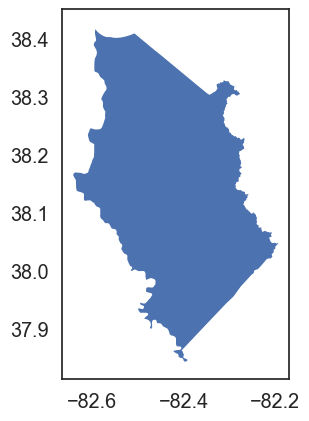

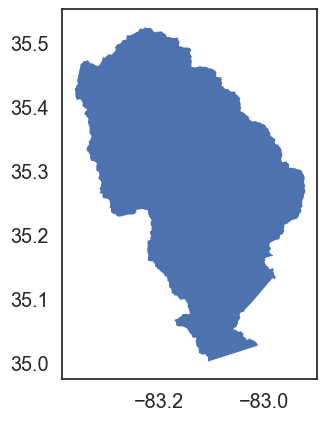

In [5]:
# Define the directory where you want to save the data
county_dir = "../county_data"  

# Create the data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Define the URL of the shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"

# Download the shapefile to the specified directory
zip_filepath = os.path.join(data_dir, "tl_2023_us_county.zip")
shapefile_path = os.path.join(data_dir, "tl_2023_us_county.shp")

# Check if the shapefile already exists
if not os.path.exists(shapefile_path):
    # Download the shapefile only if it doesn't exist
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Extract the shapefile
        with open(zip_filepath, "wb") as f:
            f.write(response.content)
        # Extract the shapefile to the specified directory
        with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
            zip_ref.extractall(data_dir)

        print("Shapefile downloaded and extracted")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading shapefile: {e}")
    except zipfile.BadZipFile as e:
        print(f"Error extracting zip file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

else:
    print("Shapefile already exists. Skipping download.")

# Load the shapefile into a GeoDataFrame
try:
    county_data = gpd.read_file(shapefile_path)

    # Filter for specific counties
    wayne_county = county_data[(county_data['STATEFP'] == '54') & (county_data['COUNTYFP'] == '099')]
    jackson_county = county_data[(county_data['STATEFP'] == '37') & (county_data['COUNTYFP'] == '099')]

    # Print the GeoDataFrames
    print("Wayne County GeoDataFrame:")
    print(wayne_county)
    print("\nJackson County GeoDataFrame:")
    print(jackson_county)

    # Plot the shapefile
    wayne_county.plot()  # Display the plot
    jackson_county.plot()
except FileNotFoundError:
    print(f"Error: Shapefile not found at {shapefile_path}. Please ensure the download and extraction were successful.")

except gpd.errors.DriverError:
    print("Error: GeoPandas driver error. Check if the shapefile is valid.")
except Exception as e:
    print(f"An unexpected error occurred while loading or processing the shapefile: {e}")

## Soil data
### From The [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/) 

In [ ]:
# Code for acquiring soil data

def get_soil_data(min_lon, max_lon, min_lat, max_lat, soil_property, depth="30_60"):
    """
    Accesses Polaris soil data for a specified bounding box.
    It constructs a URL to the Polaris soil property data service for the given
    coordinates, soil property, and depth, and attempts to open the resulting
    GeoTIFF file as an xarray DataArray.

    Args:
        min_lon (float): Minimum longitude of the bounding box.
        max_lon (float): Maximum longitude of the bounding box.
        min_lat (float): Minimum latitude of the bounding box.
        max_lat (float): Maximum latitude of the bounding box.
        soil_property (str): The desired soil property (e.g., "sand", "clay", "ph").
        depth (str, optional): The soil depth range (e.g., "0_5", "5_15", "15_30", "30_60", "60_100", "100_200").
                             Defaults to "30_60" cm.

    Returns:
        xr.DataArray or None: An xarray DataArray containing the soil data if successfully accessed,
                             otherwise None if an error occurred.
    """
    # Round coordinates to nearest integer boundaries
    min_lon = floor(min_lon)  # Round down the minimum longitude to the nearest integer.
    max_lon = ceil(max_lon)    # Round up the maximum longitude to the nearest integer.
    min_lat = floor(min_lat)  # Round down the minimum latitude to the nearest integer.
    max_lat = ceil(max_lat)    # Round up the maximum latitude to the nearest integer.

    # Construct the URL for accessing the Polaris soil data.
    # The URL follows a specific template based on the service's API.
    soil_url_template = (
        "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
        f"/{soil_property}"
        "/mean"
        f"/{depth}/"
        "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
    )
    # Format the URL template with the rounded integer coordinates.
    soil_url = soil_url_template.format(
        min_lat=int(min_lat), max_lat=int(max_lat), min_lon=int(min_lon), max_lon=int(max_lon)
    )

    try:
        # Use rioxarray to open the GeoTIFF file from the constructed URL.
        # mask_and_scale=True handles potential masking and scaling in the data.
        # .squeeze() removes any dimensions with only one element.
        soil_da = rxr.open_rasterio(soil_url, mask_and_scale=True).squeeze()
        return soil_da  # Return the xarray DataArray containing the soil data.
    except Exception as e:
        # If any error occurs during the data access (e.g., network issues, invalid URL),
        # print an informative error message and return None.
        print(f"Error accessing soil data for {soil_url}: {e}")
        return None

def get_soil_data_multiple_locations(bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat, soil_property, depth="30_60"):
    """
    Retrieves soil data for multiple 1-degree grid cells within a bounding box.
    It iterates through all 1-degree latitude and longitude tiles within the
    specified bounding box and calls the `get_soil_data` function for each tile.

    Args:
        bounds_min_lon (float): Minimum longitude of the overall bounding box.
        bounds_min_lat (float): Minimum latitude of the overall bounding box.
        bounds_max_lon (float): Maximum longitude of the overall bounding box.
        bounds_max_lat (float): Maximum latitude of the overall bounding box.
        soil_property (str): The desired soil property (e.g., "sand", "clay", "ph").
        depth (str, optional): The soil depth range. Defaults to "30_60".

    Returns:
        dict: A dictionary where keys are tuples of (min_lon, min_lat) representing
              the bottom-left corner of each 1-degree tile, and values are the
              corresponding xarray DataArrays containing the soil data. Tiles for
              which data retrieval fails will not be included in the dictionary.
    """
    soil_data_dict = {}  # Initialize an empty dictionary to store the retrieved soil data.
    # Iterate through the integer longitudes within the bounding box.
    for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
        # Iterate through the integer latitudes within the bounding box.
        for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):
            max_lon = min_lon + 1  # Define the maximum longitude for the current 1-degree tile.
            max_lat = min_lat + 1  # Define the maximum latitude for the current 1-degree tile.
            # Call the get_soil_data function to retrieve data for the current 1-degree tile.
            soil_da = get_soil_data(min_lon, max_lon, min_lat, max_lat, soil_property, depth)
            # If data was successfully retrieved (soil_da is not None),
            # store it in the dictionary with the bottom-left coordinates as the key.
            if soil_da is not None:
                soil_data_dict[(min_lon, min_lat)] = soil_da
    return soil_data_dict  # Return the dictionary containing the soil data for all retrieved tiles.

# Areas of interest
# Define a simple object to represent a county with its total bounding box.
# This is a convenient way to store the coordinates for different regions.
nc_county = type("obj",(object,),{"total_bounds":(-83, 35, -82, 36)}) # Bounding box for a county in North Carolina (min_lon, min_lat, max_lon, max_lat).
wv_county = type("obj",(object,),{"total_bounds":(-83, 37, -82, 39)}) # Bounding box for a county in West Virginia (min_lon, min_lat, max_lon, max_lat).

# Accessing data for Jackson County, NC
# Extract the bounding box coordinates for the North Carolina county.
nc_bounds_min_lon, nc_bounds_min_lat, nc_bounds_max_lon, nc_bounds_max_lat = nc_county.total_bounds
# Retrieve sand content data for the North Carolina county using the function for multiple locations.
nc_sand_data = get_soil_data_multiple_locations(
    nc_bounds_min_lon,
    nc_bounds_min_lat,
    nc_bounds_max_lon,
    nc_bounds_max_lat,
    soil_property="sand"
)
# Retrieve pH data for the North Carolina county.
nc_ph_data = get_soil_data_multiple_locations(
    nc_bounds_min_lon,
    nc_bounds_min_lat,
    nc_bounds_max_lon,
    nc_bounds_max_lat,
    soil_property="ph"
)


# Accessing data for Wayne County
# Extract the bounding box coordinates for the West Virginia county.
wv_bounds_min_lon, wv_bounds_min_lat, wv_bounds_max_lon, wv_bounds_max_lat = wv_county.total_bounds
# Retrieve sand content data for the West Virginia county.
wv_sand_data = get_soil_data_multiple_locations(
    wv_bounds_min_lon,
    wv_bounds_min_lat,
    wv_bounds_max_lon,
    wv_bounds_max_lat,
    soil_property="sand"
)

# Retrieve pH data for the West Virginia county.
wv_ph_data = get_soil_data_multiple_locations(
    wv_bounds_min_lon,
    wv_bounds_min_lat,
    wv_bounds_max_lon,
    wv_bounds_max_lat,
    soil_property="ph"
)

# Accessing the sand data for NC for a specific 1-degree tile
if (-83, 35) in nc_sand_data:
    nc_sand_data = nc_sand_data[(-83, 35)] # Access the DataArray for the tile with bottom-left coordinates (-83, 35).
    print(nc_sand_data)
else:
    print("Soil data not found for location (-83, 35)")

# Accessing the ph data for NC for a specific 1-degree tile
if (-83, 35) in nc_ph_data:
    nc_ph_data = nc_ph_data[(-83, 35)] # Access the DataArray for the tile with bottom-left coordinates (-83, 35).
    print(nc_ph_data)
else:
    print("Soil data not found for location (-83, 35)")

# Accessing the soil pH data for WV for a specific 1-degree tile
if (-83, 37) in wv_sand_data:
    wv_sand_data = wv_sand_data[(-83, 37)] # Access the DataArray for the tile with bottom-left coordinates (-83, 37).
    print (wv_sand_data)
else:
    print("Soil data not found for location (-83, 37)")

# Accessing the soil pH data for WV for a specific 1-degree tile
if (-83, 37) in wv_ph_data:
    wv_ph_data = wv_ph_data[(-83, 37)] # Access the DataArray for the tile with bottom-left coordinates (-83, 37).
    print(wv_ph_data)
else:
    print("Soil data not found for location (-83, 37)")

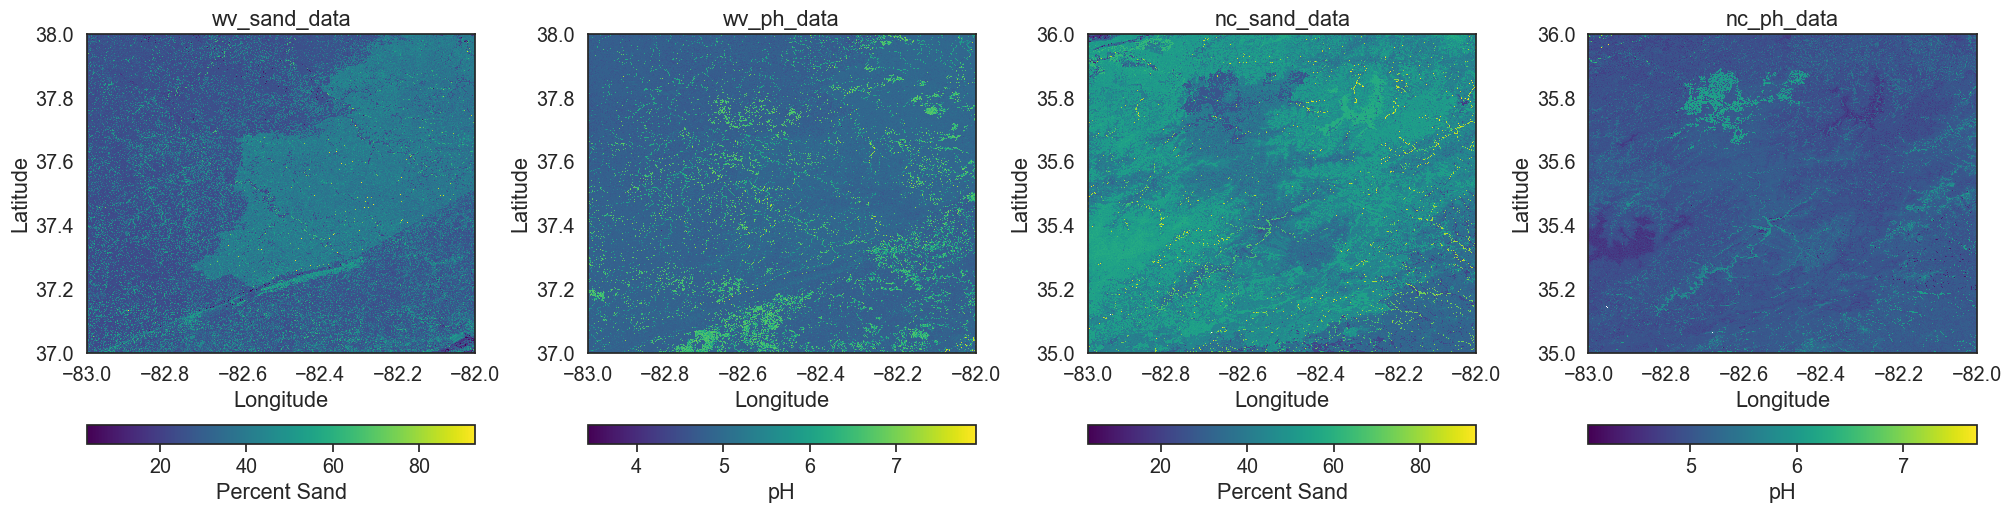

In [11]:
# Combine the lists
soil_view = [wv_sand_data, wv_ph_data, nc_sand_data, nc_ph_data]
soil_title = ['wv_sand_data', 'wv_ph_data', 'nc_sand_data', 'nc_ph_data']

# Set up subplots (adjust rows and columns for layout)
fig, axes = plt.subplots(nrows=1, ncols=len(soil_view), figsize=(20, 5), constrained_layout=True)

# Loop through each raster, open it, and plot in a subplot
sand_cbar_mappable = None  # To store the QuadMesh object for the sand colorbar
ph_cbar_mappable = None  # To store the QuadMesh object for the pH colorbar
for i, soil_da in enumerate(soil_view):

    # Plot the raster on the corresponding subplot
    quadmesh = soil_da.plot(ax=axes[i], add_colorbar=False)
    axes[i].set_title(soil_title[i])  # Add a title to each subplot
    axes[i].set_xlabel("Longitude") #Add the x label
    axes[i].set_ylabel("Latitude") #Add the y label

    # Store the QuadMesh object for the colorbar, different logic for sand and pH
    if i % 2 == 0: #sand
        if sand_cbar_mappable is None:
            sand_cbar_mappable = quadmesh
    else: #pH
        if ph_cbar_mappable is None:
            ph_cbar_mappable = quadmesh


# Add individual colorbars
    if i % 2 == 0:  # Sand
        cbar = fig.colorbar(quadmesh, ax=axes[i], orientation="horizontal", fraction=0.1, pad=0.04)
        cbar.set_label("Percent Sand")
    else:  # pH
        cbar = fig.colorbar(quadmesh, ax=axes[i], orientation="horizontal", fraction=0.1, pad=0.04)
        cbar.set_label("pH")

plt.show()

## Topographic data
### Elevation data is from the [SRTM dataset](https://www.earthdata.nasa.gov/data/instruments/srtm), available through the [earthaccess API](https://earthaccess.readthedocs.io/en/latest/quick-start/).

In [ ]:
# Acquire elevation data for both sites

def search_and_print_datasets(keyword, count=10):
    """Searches for datasets on Earthdata using a keyword and prints the
    short name and entry title of the first 'count' results.

    Args:
        keyword (str): The search term to look for in dataset metadata.
        count (int, optional): The maximum number of datasets to return. Defaults to 10.
    """
    datasets = earthaccess.search_datasets(keyword=keyword, count=count)
    for dataset in datasets:
        print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

def download_and_process_elevation(short_name, bounds, data_dir, pattern):
    """Downloads, extracts, clips, and merges elevation data tiles for a
    specified location based on the dataset short name and bounding box.

    Args:
        short_name (str): The short name of the desired elevation dataset (e.g., "SRTMGL1").
        bounds (tuple): A tuple representing the bounding box (min_lon, min_lat, max_lon, max_lat).
        data_dir (str): The directory where downloaded and extracted data will be stored.
        pattern (str): A glob pattern to identify the downloaded elevation files
                       (e.g., the pattern for .hgt.zip files).

    Returns:
        xr.DataArray or None: A merged and clipped xarray DataArray containing the
                             elevation data for the specified bounds, or None if
                             no data was found or an error occurred during processing.
    """
    # Check if files matching the pattern already exist (data might have been downloaded previously).
    if not glob(pattern):
        # Search for data on Earthdata based on the short name and bounding box.
        results = earthaccess.search_data(short_name=short_name, bounding_box=bounds)
        if results:  # Check if any data was found for the given search criteria.
            # Download the found data files to the specified directory.
            earthaccess.download(results, data_dir)
        else:
            print(f"No data found for {short_name} within the given bounds.")
            return None  # Return None if no data was available for download.

    da_list = []  # Initialize an empty list to store individual elevation DataArrays.
    # Iterate through all files that match the specified pattern in the data directory.
    for path in glob(pattern):
        # Open each raster file (likely a GeoTIFF within a zip) using rioxarray.
        # mask_and_scale=True handles potential masking and scaling.
        # .squeeze() removes any unnecessary dimensions of size 1.
        tile_da = rxr.open_rasterio(path, mask_and_scale=True).squeeze()
        try:
            # Clip the individual tile DataArray to the exact specified bounding box.
            # allow_one_dimensional_raster=True handles cases where the clipped area
            # might result in a 1D raster.
            cropped_da = tile_da.rio.clip_box(*bounds, allow_one_dimensional_raster=True)
            da_list.append(cropped_da)  # Add the cropped DataArray to the list.
        except ValueError as e:
            # Catch any ValueError that might occur during the clipping process (e.g.,
            # if the tile doesn't overlap with the bounds significantly).
            print(f"Error clipping {path}: {e}")
            continue  # Skip to the next file if an error occurs during clipping.

    # If no tiles were successfully processed and added to the list after download, return None.
    if not da_list:
        print(f"No tiles found after download for {short_name}.")
        return None
    # Merge the list of cropped DataArrays into a single DataArray.
    return rxrmerge.merge_arrays(da_list)

# Data for each location
wv_data_dir = "../topography_data/wv_data"  # Directory to store elevation data for West Virginia.
nc_data_dir = "../topography_data/nc_data"  # Directory to store elevation data for North Carolina.

# Create directories if they don't exist. exist_ok=True prevents errors if the directories already exist.
os.makedirs(wv_data_dir, exist_ok=True)
os.makedirs(nc_data_dir, exist_ok=True)

# Define bounding boxes for the two counties of interest.
wv_county = type("obj",(object,),{"total_bounds":(-83, 37, -82, 39)})
nc_county = type("obj",(object,),{"total_bounds":(-83, 35, -82, 36)})

# Login to the earthaccess library to enable data searching and downloading.
earthaccess.login()

# Search for SRTM DEM (Shuttle Radar Topography Mission Digital Elevation Model) datasets
# and print the short name and title of the first 11 results. This helps identify
# the correct dataset to use.
search_and_print_datasets(keyword='SRTM DEM', count=11)

# Download and process elevation data for Wayne County, West Virginia.
wv_srtm_pattern = os.path.join(wv_data_dir, '*.hgt.zip') # Pattern to find downloaded SRTM files (likely .hgt.zip).
wv_bounds = tuple(wv_county.total_bounds) # Convert the bounding box object to a tuple.
wv_srtm_da = download_and_process_elevation(
    short_name="SRTMGL1", # The short name of the SRTM Global 1 arc second elevation dataset.
    bounds=wv_bounds,
    data_dir=wv_data_dir,
    pattern=wv_srtm_pattern,
)

# Download and process elevation data for Jackson County, North Carolina.
nc_srtm_pattern = os.path.join(nc_data_dir, '*.hgt.zip') # Pattern to find downloaded SRTM files.
nc_bounds = tuple(nc_county.total_bounds) # Convert the bounding box object to a tuple.
nc_srtm_da = download_and_process_elevation(
    short_name="SRTMGL1", # Using the same SRTM dataset for both locations.
    bounds=nc_bounds,
    data_dir=nc_data_dir,
    pattern=nc_srtm_pattern,
)

print("West Virginia elevation data processed.")
print("North Carolina elevation data processed.")

# Plotting the elevation data if both DataArrays were successfully created.
if wv_srtm_da is not None and nc_srtm_da is not None:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Create a figure with two subplots side by side.

    wv_srtm_da.plot(ax=axes[0], cmap='terrain') # Plot the WV elevation data on the first subplot with a 'terrain' colormap.
    axes[0].set_title('Wayne County, WV Elevation') # Set the title for the first subplot.

    nc_srtm_da.plot(ax=axes[1], cmap='terrain') # Plot the NC elevation data on the second subplot with a 'terrain' colormap.
    axes[1].set_title('Jackson County, NC Elevation') # Set the title for the second subplot.


    plt.tight_layout() # Adjust subplot parameters for a tight layout.
    plt.show() # Display the plot.
else:
    print("One or both elevation data arrays are None. Cannot plot.")

## Climate model data
### I have made several attempts to use [MACAv2 data]("http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html") for both historic and future climate data unsuccessfully.

### The following is pseudocode which describes how to combine 8 climate rasters (four models, 2 time periods) for each site. I have relied heavily on my classmate [Lauren Alexandra's](https://github.com/lauren-alexandra/habitat-suitability/blob/main/habitat-suitability.ipynb) work for this aspect of the project.


In [19]:
# Define the directory where the data is saved
data_dir = "../county_data"
shapefile_path = os.path.join(data_dir, "tl_2023_us_county.shp")

try:
    # Load the shapefile into a GeoDataFrame
    county_data = gpd.read_file(shapefile_path)

    # Filter for specific counties (assuming these were the filters used in the original code)
    wayne_county = county_data[(county_data['STATEFP'] == '54') & (county_data['COUNTYFP'] == '099')].copy()
    jackson_county = county_data[(county_data['STATEFP'] == '37') & (county_data['COUNTYFP'] == '099')].copy()

    # Reproject to EPSG:4326
    wayne_county_reprojected = wayne_county.to_crs(epsg=4326)
    jackson_county_reprojected = jackson_county.to_crs(epsg=4326)

except FileNotFoundError:
    print(f"Error: Shapefile not found at {shapefile_path}")
except ImportError as e:
    print(f"Error: Missing required library: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [ ]:
# site dictionary
location_dict = {
    'wv': wayne_county,
    'nc': jackson_county
}

# Set climate parameters
hist_scenario = 'historical'
proj_scenario = 'rcp85'
climate_models = ['MIROC5', 'NorESMI-M', 'IPSL-CM5A-MR', 'GFDL-ESM2M'] 
last_century = [1970, 1975, 1980, 1985, 1990, 1995] # 1970-2000 
this_century = [2036, 2041, 2046, 2051, 2056, 2061] # 2036-2066
time_periods = [this_century, last_century]

# For historical climate data at NC location
download_climate('nc', jackson_county,
                hist_scenario, climate_models, last_century,
                'jackson_hist', model_data_dir)

# For projected climate data at NC location
download_climate('nc', jackson_county,
                proj_scenario, climate_models, this_century,
                'jackson_proj', model_data_dir)

# For historical climate data at WV location
download_climate('wv', wayne_county,
                hist_scenario, climate_models, last_century,
                'wayne_hist', model_data_dir)

# For projected climate data at WV location
download_climate('wv', wayne_county,
                proj_scenario, climate_models, this_century,
                'wayne_proj', model_data_dir)



In [ ]:
# Access MACAv2 data
url = "https://www.reacchpna.org/thredds/dodsC/MACAV2/MIROC5/macav2metdata_tasmin_MIROC5_r1i1p1_historical_1980_1984_CONUS_monthly.nc" #use dodsC to access data directly

try:
    # Open the NetCDF dataset from the URL
    dataset = netCDF4.Dataset(url)

    # Print the dataset's variables and dimensions for inspection
    print(dataset) #prints metadata

    # Example: Access a specific variable (e.g., 'tasmin' for minimum temperature)
    temperature = dataset.variables['air_temperature']

    # Example: Access a slice of the data (e.g., first 10 time steps, a specific latitude/longitude point)
    time_slice = temperature[:10, :, :]  # First 10 time steps, all lat/lon
    lat_index = 10 #example
    lon_index = 20 #example
    point_data = temperature[:, lat_index, lon_index] #all times, a specific lat/lon

    # Print the shape of the sliced data and some values
    print("Time slice shape:", time_slice.shape)
    print("Point data shape: ", point_data.shape)
    print("First few values of time slice:\n", time_slice[0, :5, :5]) #small subset for printing
    print("First few values of point data:\n", point_data[:5])

    # Accessing dimension variables (e.g., time, lat, lon)
    time = dataset.variables['time']
    lat = dataset.variables['lat']
    lon = dataset.variables['lon']
    print("Time values:", time[:10])
    print("Latitude values:", lat[lat_index-2:lat_index+2])
    print("Longitude values:", lon[lon_index-2:lon_index+2])

    #Close the dataset
    dataset.close()

except Exception as e:
    print(f"Error: {e}")

In [ ]:
def convert_longitude(longitude):
    """Convert longitude from 0-360 to -180 to 180.
    This function takes a longitude value that might be in the 0 to 360 degree range
    and converts it to the standard -180 to 180 degree range used in many geospatial datasets.
    """
    return (longitude - 360) if longitude > 180 else longitude

# URL to the MACA (Multivariate Adaptive Constructed Analogs) dataset on a THREDDS server.
# This specific URL points to monthly minimum air temperature data from the MIROC5 climate model
# for the historical period of 1980-1984 over the Contiguous United States (CONUS).
maca_url = ('https://www.reacchpna.org/thredds/dodsC'
            '/MACAV2/MIROC5/macav2metdata_tasmin_MIROC5_r1i1p1_historical_1980_1984_CONUS_monthly.nc')

# Open the NetCDF dataset from the URL using xarray and remove any dimensions of size 1 using .squeeze().
# Then, select the 'air_temperature' variable from the dataset.
maca_da = xr.open_dataset(maca_url).squeeze().air_temperature

# Reassign the longitude coordinates of the DataArray.
# It takes the existing longitude values and applies the 'convert_longitude' function
# to each value, effectively converting the longitude range if necessary.
maca_da = maca_da.assign_coords(
    lon=("lon", [convert_longitude(l) for l in maca_da.lon.values]))

# Set the spatial dimensions of the DataArray using rioxarray.
# This explicitly tells rioxarray which dimensions correspond to longitude ('lon') and latitude ('lat').
maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim='lat')

# Open the NetCDF dataset from the URL again and remove singleton dimensions.
# Note: This line reloads the entire dataset. It might be redundant if the intention
# was to work with the 'air_temperature' DataArray created in the previous step.
maca_da = xr.open_dataset(maca_url).squeeze()

# Convert jackson_county to the correct CRS (Coordinate Reference System) if needed.
# Check if the MACA DataArray has a CRS defined. If not, assign the standard WGS 84 CRS (EPSG:4326).
if maca_da.rio.crs is None:
    maca_da = maca_da.rio.write_crs("epsg:4326") # assigning a crs if it does not have one.
# Check if the CRS of the 'jackson_county_reprojected' GeoDataFrame is different from
# the CRS of the MACA DataArray. If they are different, reproject the GeoDataFrame
# to match the MACA DataArray's CRS to ensure spatial alignment for subsequent operations.
if jackson_county_reprojected.crs != maca_da.rio.crs:
    jackson_county_reprojected = jackson_county_reprojected.to_crs(maca_da.rio.crs)

# Convert wayne_county to the correct CRS if needed.
# Similar to the handling of 'jackson_county_reprojected', this ensures that the
# 'wayne_county_reprojected' GeoDataFrame has the same CRS as the MACA DataArray.
if maca_da.rio.crs is None:
    maca_da = maca_da.rio.write_crs("epsg:4326") # assigning a crs if it does not have one.
if wayne_county_reprojected.crs != maca_da.rio.crs:
    wayne_county_reprojected = wayne_county_reprojected.to_crs(maca_da.rio.crs)

# Extract the geometry from the 'jackson_county_reprojected' GeoDataFrame.
# It iterates through the 'geometry' column of the GeoDataFrame and extracts the
# Shapely geometry object for each feature, then converts it to a GeoJSON-like mapping
# using the 'mapping' function from the 'shapely.geometry' module. This format is often
# used for clipping raster data based on vector geometries.
nc_geometry = [mapping(shape) for shape in jackson_county_reprojected.geometry]

# Extract the geometry from the 'wayne_county_reprojected' GeoDataFrame.
# This does the same as above, but for the 'wayne_county_reprojected' GeoDataFrame.
wv_geometry = [mapping(shape) for shape in wayne_county_reprojected.geometry]

# Clip the MACA DataArray to the spatial extent of the North Carolina (Jackson County) geometry.
# 'rio.clip' uses the provided geometry to subset the raster data.
# 'crs' specifies the Coordinate Reference System of the clipping geometry.
# 'all_touched=False' means that only cells whose center falls within the geometry will be included.
nc_maca_clipped = maca_da.rio.clip(nc_geometry, crs=maca_da.rio.crs, all_touched=False)

# Clip the MACA DataArray to the spatial extent of the West Virginia (Wayne County) geometry.
# This performs the same clipping operation as above, but using the geometry of Wayne County.
wv_maca_clipped = maca_da.rio.clip(wv_geometry, crs=maca_da.rio.crs, all_touched=False)

## HARMONIZE DATA
### The data grids for soil and elevation in both locations - North Caolina & West Virginia - are processed so they match each other using the [reproject, match method from rioxarray](https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match). The temperature data is included as a separate code block as pseudocode due to difficulty with that part of the assignment.

In [ ]:
# Print information about the West Virginia dimensions and coordinates of data to be harmonized
print("SRTM Dimensions:", wv_srtm_da.dims)
print("SRTM Coordinates:", wv_srtm_da.coords)

print("Sand Dimensions:", wv_sand_data.dims)
print("Sand Coordinates:", wv_sand_data.coords)

print("pH Dimensions:", wv_ph_data.dims)
print("pH Coordinates:", wv_ph_data.coords)

In [15]:
wv_harmonized_data = xr.Dataset({
    'srtm': wv_srtm_da,  # Or cropped/aligned version
    'sand': wv_sand_data,  # Or cropped/aligned version
    'ph': wv_ph_data      # Or cropped/aligned version
})
print(wv_harmonized_data)

<xarray.Dataset> Size: 933MB
Dimensions:      (x: 7201, y: 10801)
Coordinates:
  * x            (x) float64 58kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 86kB 37.0 37.0 37.0 37.0 ... 39.0 39.0 39.0 39.0
    spatial_ref  int64 8B 0
    band         int64 8B 1
Data variables:
    srtm         (y, x) float32 311MB 541.0 nan 537.0 nan ... 177.0 nan 174.0
    sand         (y, x) float32 311MB nan nan nan nan nan ... nan nan nan nan
    ph           (y, x) float32 311MB nan nan nan nan nan ... nan nan nan nan


In [ ]:
import dask.array

def define_ideal_conditions_chunked(elevation_da, ph_da, sand_da, location_name):
    """
    Defines ideal conditions using chunked operations.

    Args:
        elevation_da (xr.DataArray): Chunked xarray DataArray of elevation values.
        ph_da (xr.DataArray): Chunked xarray DataArray of pH values.
        sand_da (xr.DataArray): Chunked xarray DataArray of sand content values (percentage).
        location_name (str): A string identifying the location (e.g., 'wv').

    Returns:
        xr.DataArray: A chunked boolean xarray DataArray where True indicates
                      ideal conditions are met, and False otherwise. The
                      'location' attribute is added to this DataArray.
    """
    # Define the condition for ideal habitat
    ideal_elevation = elevation_da < 6200
    ideal_ph = (ph_da >= 3.5) & (ph_da <= 5.6)
    ideal_sand = sand_da > 50

    # Combine all ideal conditions using a logical AND operation.
    # Only pixels that satisfy all three conditions will be marked as True.
    ideal_conditions = ideal_elevation & ideal_ph & ideal_sand
    # Add an attribute to the resulting DataArray to store the location name.
    ideal_conditions.attrs['location'] = location_name
    return ideal_conditions

# Chunk the DataArrays within the Dataset to enable parallel and out-of-core computation using Dask.
wv_harmonized_chunked = wv_harmonized_data.chunk({'x': 1000, 'y': 1000}) # Adjust chunk sizes as needed

# Apply the 'define_ideal_conditions_chunked' function to the chunked DataArrays
# for the 'wv' (West Virginia) location.
ideal_wv_chunked = define_ideal_conditions_chunked(
    wv_harmonized_chunked['srtm'],
    wv_harmonized_chunked['ph'],
    wv_harmonized_chunked['sand'],
    'wv'
)

# Trigger the actual computation of the 'ideal_wv_chunked' DataArray.
ideal_wv_computed = ideal_wv_chunked.compute()

# Print the resulting boolean DataArray
print(ideal_wv_computed)

# Analyze results (computation will happen chunk by chunk)
ideal_pixels_wv = ideal_wv_computed.sum().item()
total_pixels_wv = ideal_wv_computed.size
percentage_ideal_wv = (ideal_pixels_wv / total_pixels_wv) * 100
print(f"Location 'wv': {ideal_pixels_wv} ideal pixels out of {total_pixels_wv} ({percentage_ideal_wv:.2f}%)")

<xarray.DataArray (y: 10801, x: 7201)> Size: 78MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * x            (x) float64 58kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 86kB 37.0 37.0 37.0 37.0 ... 39.0 39.0 39.0 39.0
    spatial_ref  int64 8B 0
    band         int64 8B 1
Attributes:
    location:  wv
Location 'wv': 0 ideal pixels out of 77778001 (0.00%)


In [ ]:
# Print information about the North Carolina dimensions and coordinates of data to be harmonized
print("SRTM Dimensions:", nc_srtm_da.dims)
print("SRTM Coordinates:", nc_srtm_da.coords)

print("Sand Dimensions:", nc_sand_data.dims)
print("Sand Coordinates:", nc_sand_data.coords)

print("pH Dimensions:", nc_ph_data.dims)
print("pH Coordinates:", nc_ph_data.coords)

SRTM Dimensions: ('y', 'x')
SRTM Coordinates: Coordinates:
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0
    band         int64 8B 1
Sand Dimensions: ('y', 'x')
Sand Coordinates: Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0
pH Dimensions: ('y', 'x')
pH Coordinates: Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 29kB 36.0 36.0 36.0 36.0 ... 35.0 35.0 35.0 35.0
    spatial_ref  int64 8B 0


In [19]:
nc_harmonized_data = xr.Dataset({
    'srtm': nc_srtm_da,  # Or cropped/aligned version
    'sand': nc_sand_data,  # Or cropped/aligned version
    'ph': nc_ph_data      # Or cropped/aligned version
})
print(nc_harmonized_data)

<xarray.Dataset> Size: 622MB
Dimensions:      (x: 7201, y: 7201)
Coordinates:
  * x            (x) float64 58kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 58kB 35.0 35.0 35.0 35.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 8B 0
    band         int64 8B 1
Data variables:
    srtm         (y, x) float32 207MB 575.0 nan 573.0 ... nan 1.136e+03
    sand         (y, x) float32 207MB nan nan nan nan nan ... nan nan nan nan
    ph           (y, x) float32 207MB nan nan nan nan nan ... nan nan nan nan


In [ ]:
# Repeat block for North Carolina data

def define_ideal_conditions_chunked(elevation_da, ph_da, sand_da, location_name):
    """
    Defines ideal conditions using chunked operations.
    """
    ideal_elevation = elevation_da < 6200
    ideal_ph = (ph_da >= 3.5) & (ph_da <= 5.6)
    ideal_sand = sand_da > 50

    ideal_conditions = ideal_elevation & ideal_ph & ideal_sand
    ideal_conditions.attrs['location'] = location_name
    return ideal_conditions

# Assuming wv_harmonized_data is your xarray Dataset
nc_harmonized_chunked = nc_harmonized_data.chunk({'x': 1000, 'y': 1000}) # Adjust chunk sizes as needed

ideal_nc_chunked = define_ideal_conditions_chunked(
    nc_harmonized_chunked['srtm'],
    nc_harmonized_chunked['ph'],
    nc_harmonized_chunked['sand'],
    'nc'
)

# To get a single boolean DataArray (computation will be lazy)
ideal_nc_computed = ideal_nc_chunked.compute()

print(ideal_nc_computed)

# Analyze results (computation will happen chunk by chunk)
ideal_pixels_nc = ideal_nc_computed.sum().item()
total_pixels_nc = ideal_nc_computed.size
percentage_ideal_nc = (ideal_pixels_nc / total_pixels_nc) * 100
print(f"Location 'nc': {ideal_pixels_nc} ideal pixels out of {total_pixels_nc} ({percentage_ideal_nc:.2f}%)")

<xarray.DataArray (y: 7201, x: 7201)> Size: 52MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * x            (x) float64 58kB -83.0 -83.0 -83.0 -83.0 ... -82.0 -82.0 -82.0
  * y            (y) float64 58kB 35.0 35.0 35.0 35.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 8B 0
    band         int64 8B 1
Attributes:
    location:  nc
Location 'nc': 0 ideal pixels out of 51854401 (0.00%)


## Interesting that in both Jackson County NC and Wayne County WV there are no ideal places for Rhododendron to live based on this harmonization. However, looking at the data harmonized, soil characteristics data was not included. Given more time, I would investigate further. I did confirm that all 6 datasets were the same crs, however there may be a difference in resolution that prevented the data from being included. 

## FUZZY LOGIC MODEL
### The [`scikit-fuzzy`](https://pythonhosted.org/scikit-fuzzy/) library is used to convert data into values from 0 to 1 using _Rhododendron maximum_ habitat information. Layers for each variable are combined to get a single suitability number for each square. 

### Unfortunately, I was not able to extrat minimum temperature records and projections from the MACAV2 models, so the following is pseudocode which describes how to combine 8 climate rasters (four models, 2 time periods) for each site. I have relied heavily on my classmate [Lauren Alexandra's](https://github.com/lauren-alexandra/habitat-suitability/blob/main/habitat-suitability.ipynb) work for this aspect of the project.

In [ ]:
# Create suitability model for West Virginia

# MIROC5 models

build_habitat_suitability_model('wv', 'last_century', 'MIROC5',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_lc_MIROC5_suitability')

build_habitat_suitability_model('wv', 'this_century', 'MIROC5',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_tc_MIROC5_suitability')

# NorESMI-M models

build_habitat_suitability_model('wv', 'last_century', 'NorESMI-M',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_lc_MIROC5_suitability')

build_habitat_suitability_model('wv', 'this_century', 'NorESMI-M',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_tc_MIROC5_suitability')

# IPSL-CM5A-MR models

build_habitat_suitability_model('wv', 'last_century', 'IPSL-CM5A-MR',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_lc_MIROC5_suitability')

build_habitat_suitability_model('wv', 'this_century', 'IPSL-CM5A-MR',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_tc_MIROC5_suitability')


# GFDL-ESM2M models

build_habitat_suitability_model('wv', 'last_century', 'GFDL-ESM2M',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_lc_MIROC5_suitability')

build_habitat_suitability_model('wv', 'this_century', 'GFDL-ESM2M',
                                optimal_values, tolerance_ranges, data_dir, 
                                'wv_tc_MIROC5_suitability')


## RESULTS
### Plots showing habitat suitability for _Rhododendron maximum_ in North Carolina and West Virginia based upon retrieved data is not possible because I am using pseudocode. Given more time, I would attempt to resolve the issues with retrieval of minimum temperature data and the failure to harmonize soil and elevation data. 